# Gridsearch CV with SVM

## Ridhwan Hassan

In [1]:
import pandas as pd  
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import utils
%matplotlib inline

# Multiclassifier
### One-Vs-The-Rest

In [2]:
fetal = pd.read_csv('random/fetal_health.csv')
fetal.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

- 'baseline value' FHR baseline (beats per minute)
- 'accelerations' Number of accelerations per second
- 'fetal_movement' Number of fetal movements per second
- 'uterine_contractions' Number of uterine contractions per second
- 'light_decelerations' Number of light decelerations per second
- 'severe_decelerations' Number of severe decelerations per second
- 'prolongued_decelerations' Number of prolonged decelerations per second
- 'abnormal_short_term_variability' Percentage of time with abnormal short term variability
- 'mean_value_of_short_term_variability' Mean value of short term variability
- 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
- 'mean_value_of_long_term_variability' Mean value of long term variability
- 'histogram_width' Width of FHR histogram
- 'histogram_min' Minimum (low frequency) of FHR histogram
- 'histogram_max' Maximum (high frequency) of FHR histogram
- 'histogram_number_of_peaks' Number of histogram peaks
- 'histogram_number_of_zeroes' Number of histogram zeros
- 'histogram_mode' Histogram mode
- 'histogram_mean' Histogram mean
- 'histogram_median' Histogram median
- 'histogram_variance' Histogram variance
- 'histogram_tendency' Histogram tendency

Target

'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [3]:
print('data shape ', fetal.shape)
print('')
print('\ndata info ', fetal.info())

data shape  (2126, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_

In [4]:
fetal.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

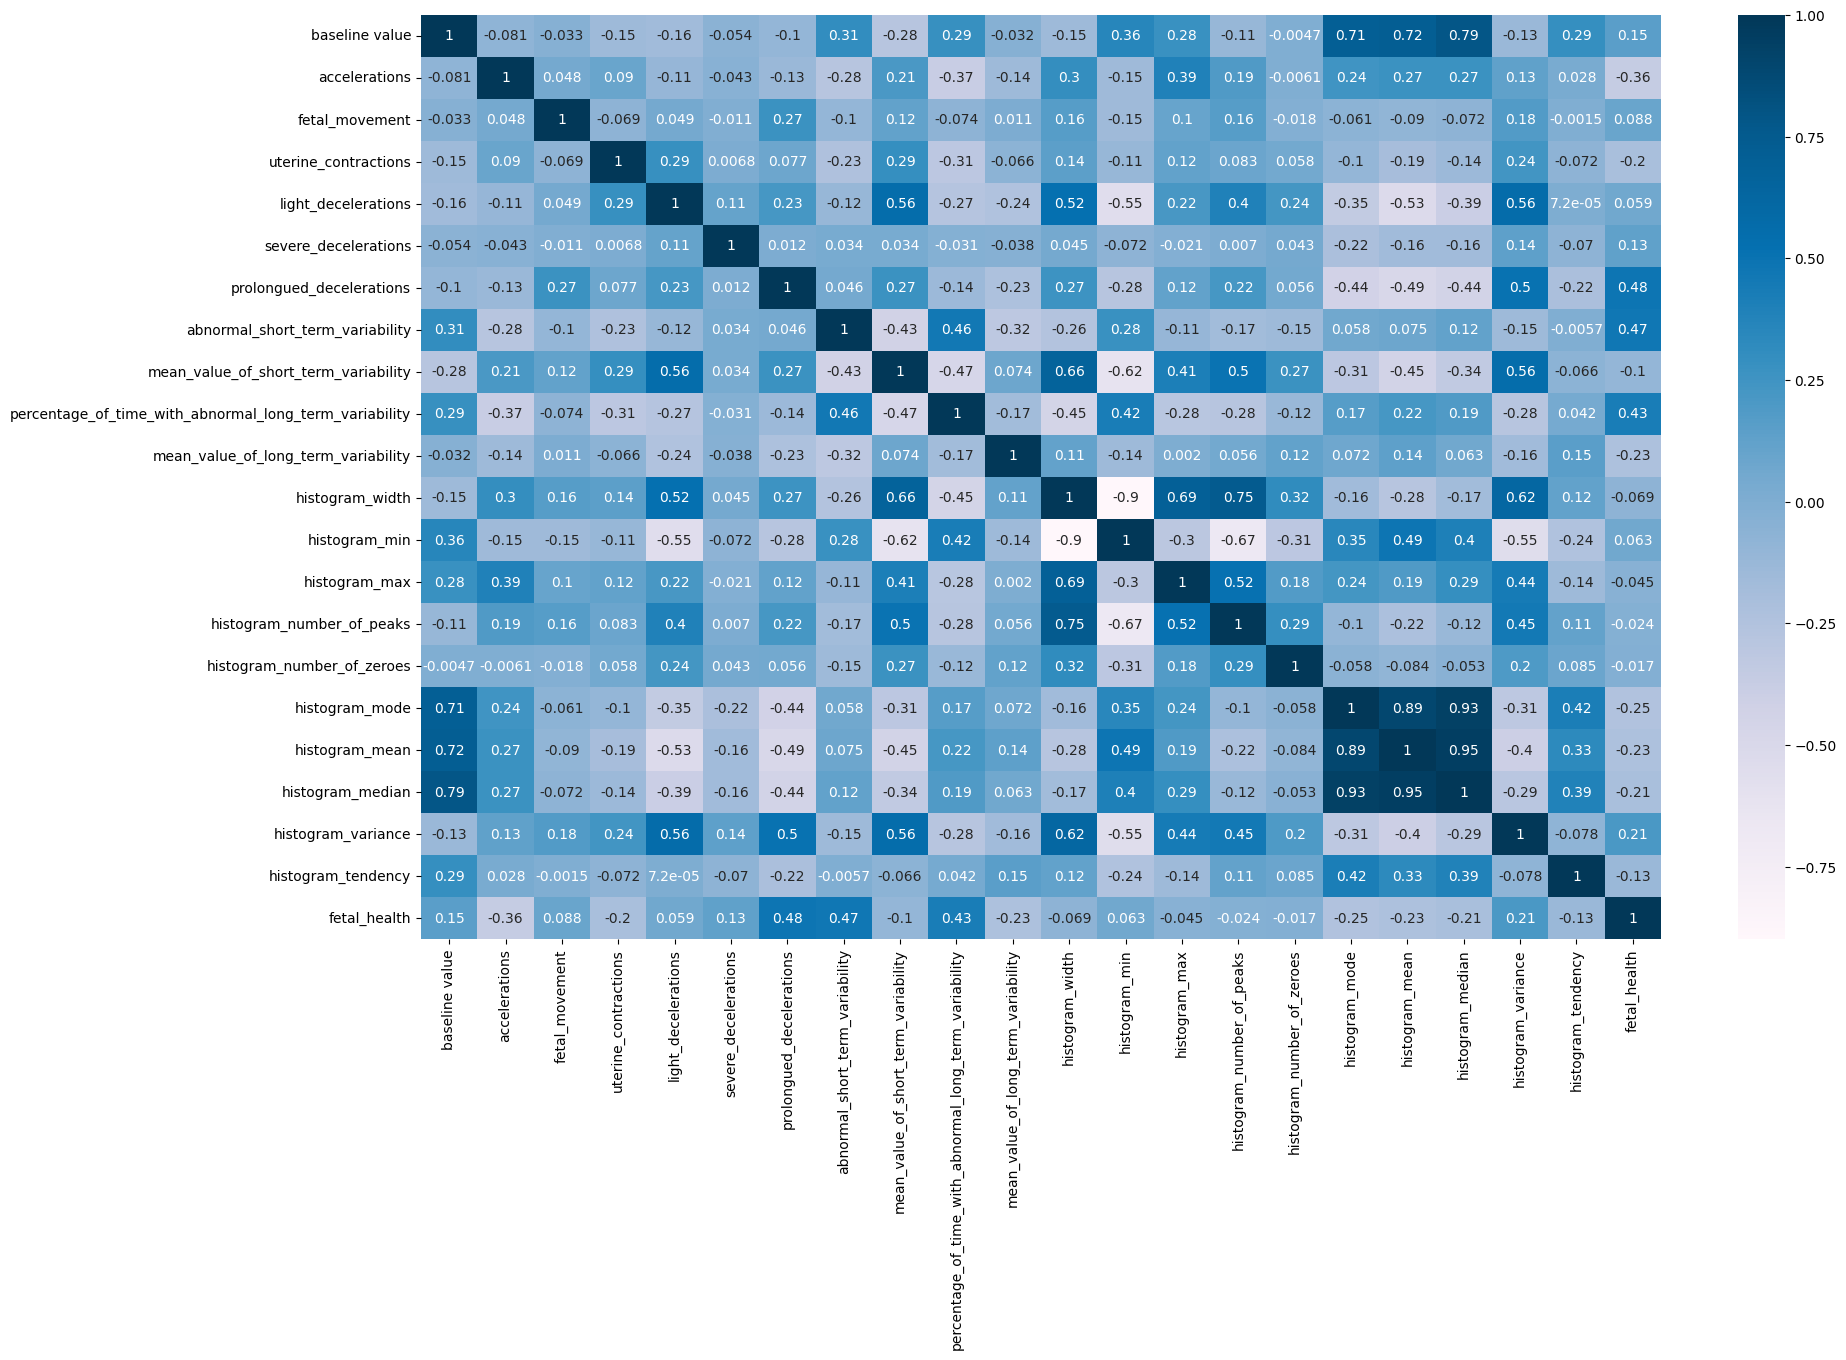

In [5]:
plt.figure(figsize=(20,12))
sns.heatmap(fetal.corr(), annot=True, cmap="PuBu")
plt.savefig('corr.png')

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


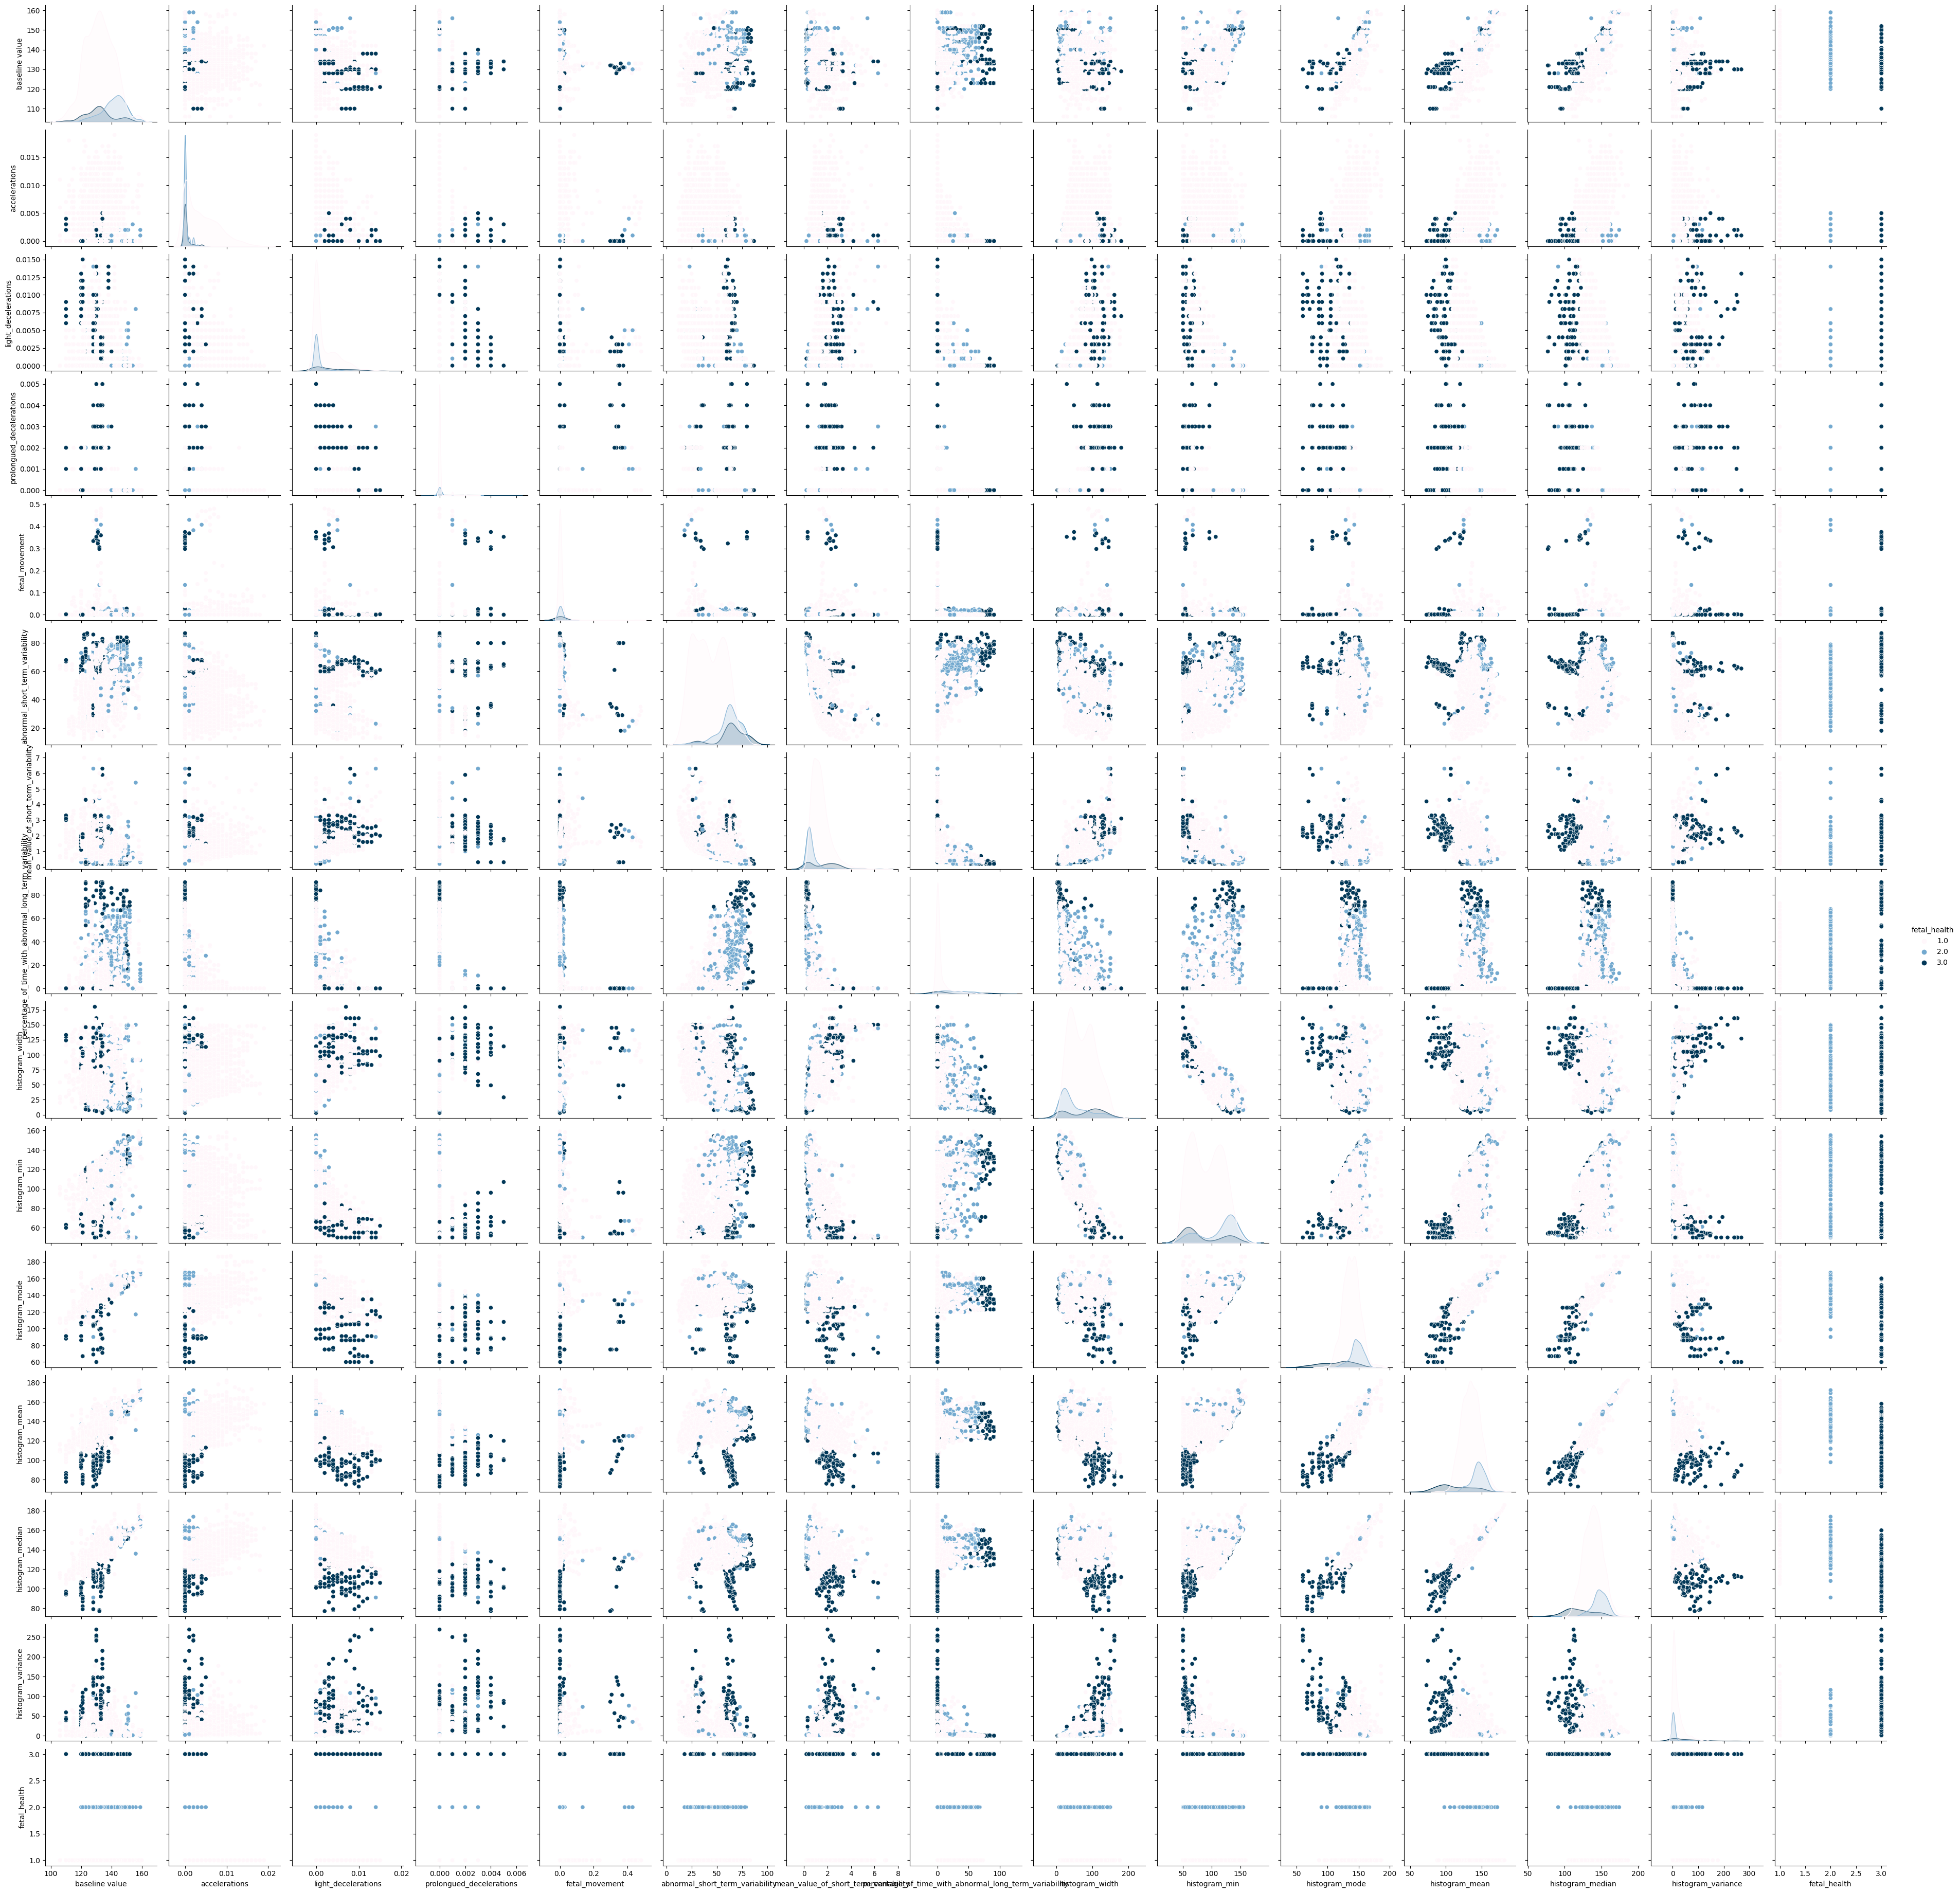

In [6]:
cols = ['baseline value',
'accelerations',
'light_decelerations',
'prolongued_decelerations',
'fetal_movement',
'abnormal_short_term_variability',
'mean_value_of_short_term_variability',
'percentage_of_time_with_abnormal_long_term_variability',
'histogram_width',
'histogram_min',
'histogram_mode',
'histogram_mean',
'histogram_median',
'histogram_variance',
'fetal_health']
sns.pairplot(fetal, vars=cols, hue='fetal_health', palette="PuBu")

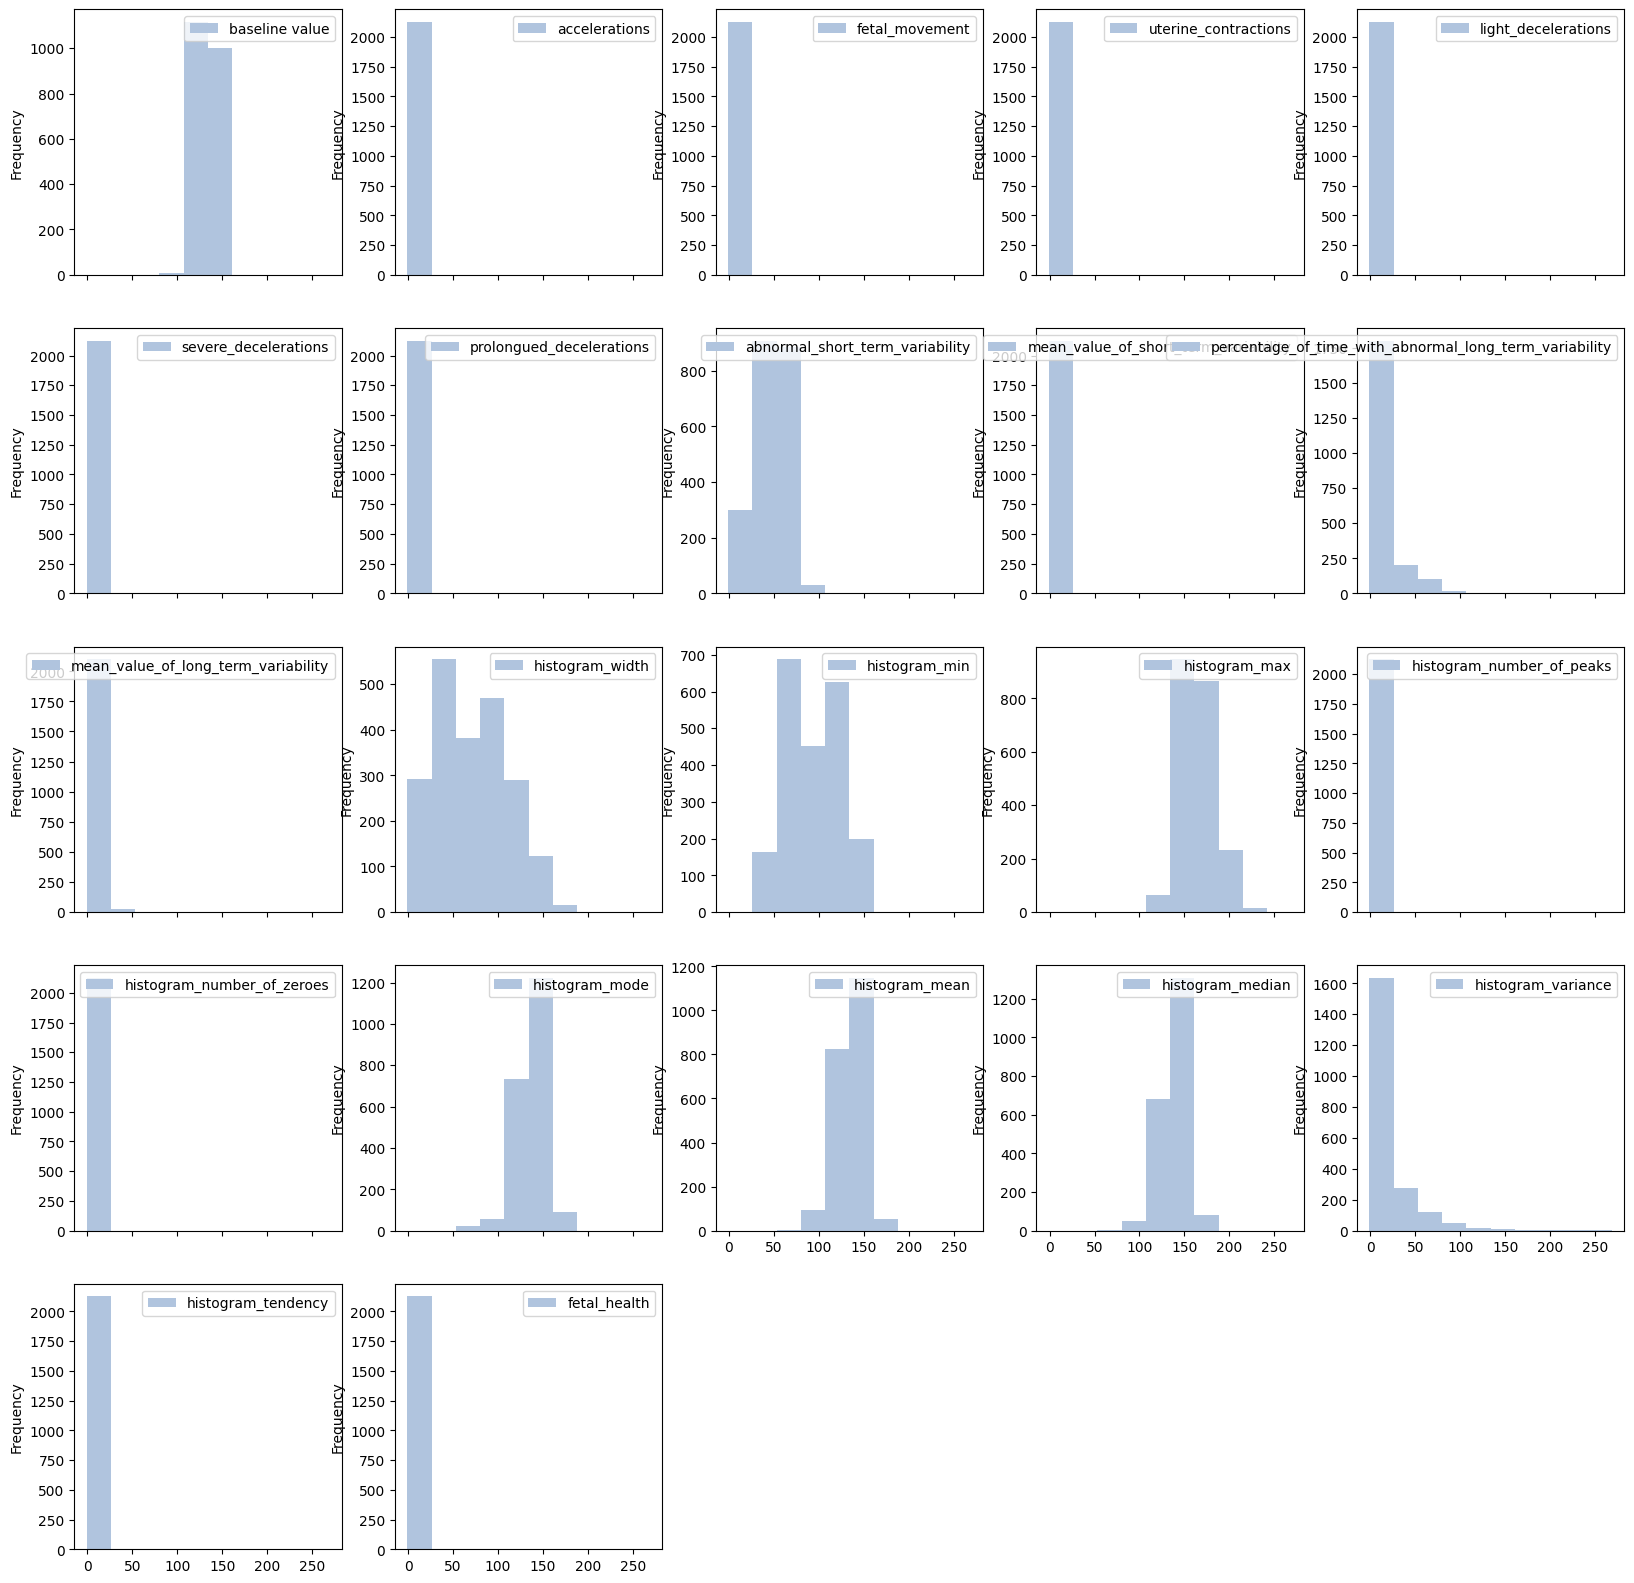

In [7]:
hist_plot = fetal.plot(kind="hist", layout=(5,5), subplots=True, figsize=(20,20), color='lightsteelblue', backend='matplotlib')
plt.savefig('dist.png')

In [8]:
fetal['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [12]:
fetal.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

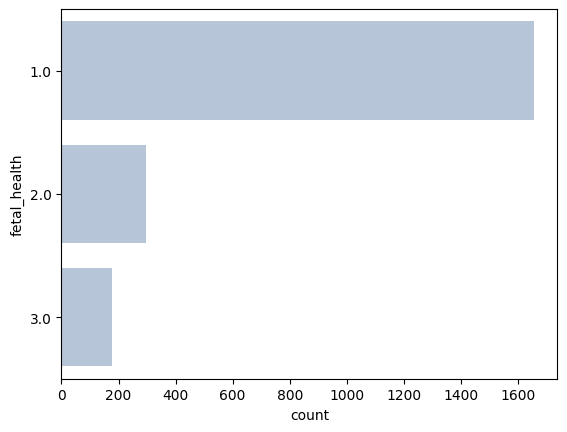

In [13]:
plot = sns.countplot(fetal, y='fetal_health', color='lightsteelblue')
fig = plot.get_figure()
fig.savefig("class.png") 

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


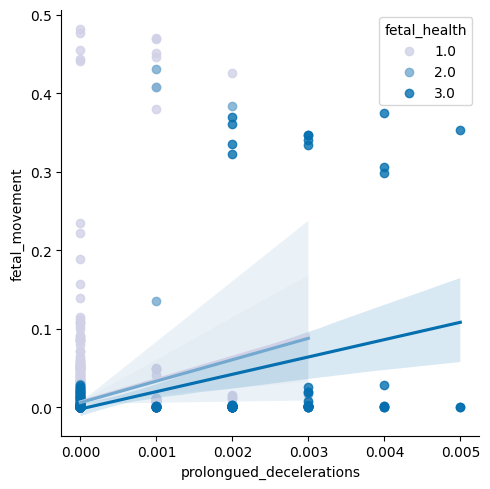

In [14]:
plot = sns.lmplot(data =fetal,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health",legend_out=False, palette='PuBu')
plot.savefig("prolongued_decelerations.png") 
plt.show()

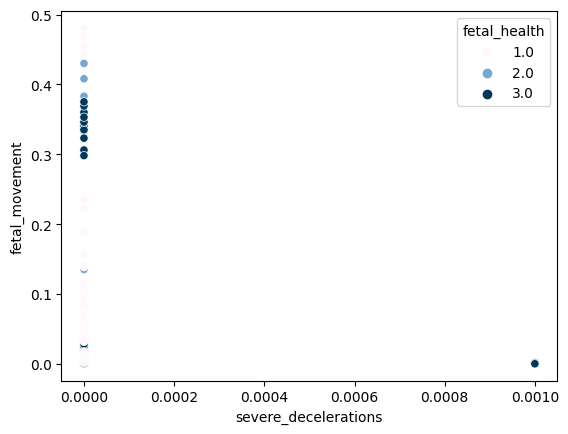

In [15]:
plot = sns.scatterplot(data =fetal,x="severe_decelerations",y="fetal_movement", hue="fetal_health", palette='PuBu')
fig = plot.get_figure()
fig.savefig("severe_decelerations.png") 

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


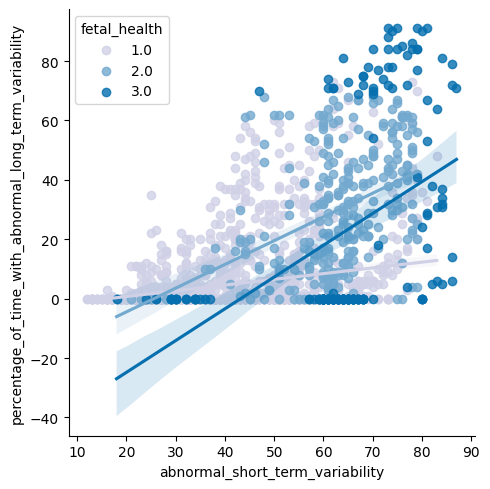

In [16]:
sns.lmplot(data =fetal,x="abnormal_short_term_variability",y="percentage_of_time_with_abnormal_long_term_variability", hue="fetal_health",legend_out=False, palette='PuBu')
plt.show()

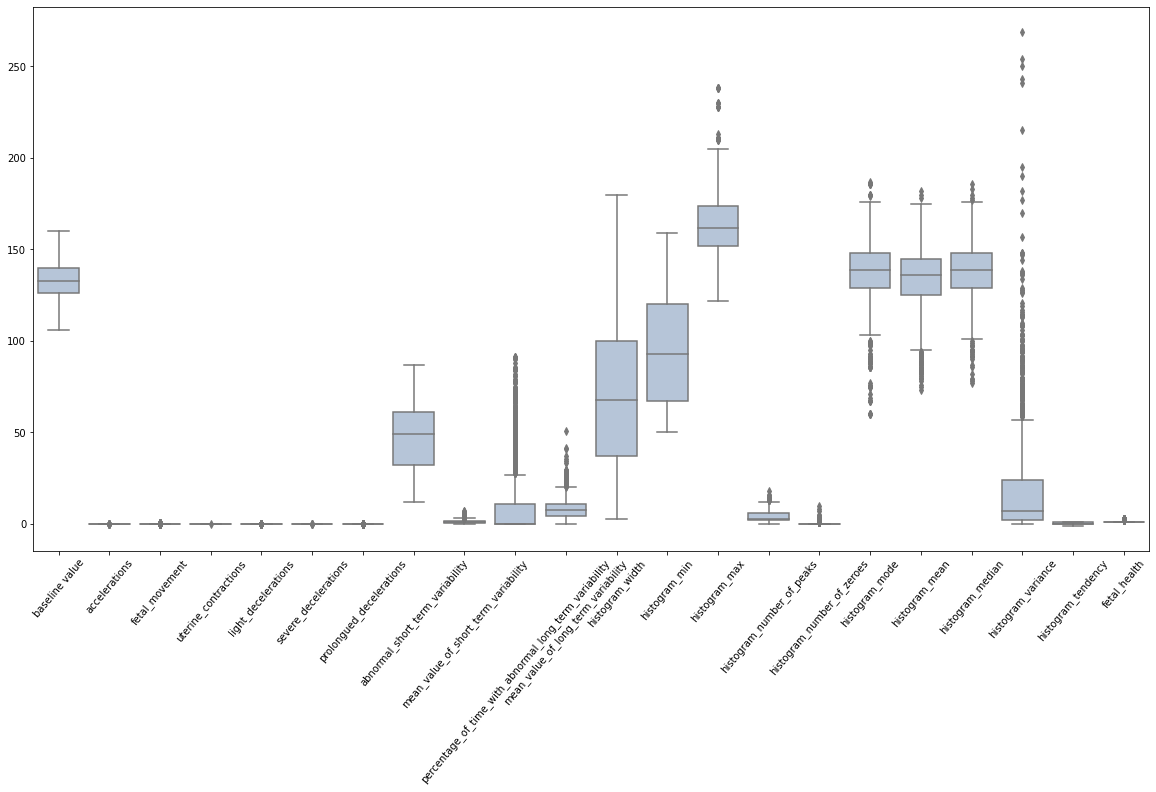

In [ ]:
plot = plt.figure(figsize=(20,10))
sns.boxplot(data = fetal, color='lightsteelblue')
plt.xticks(rotation=50)
plt.show()
fig = plot.get_figure()
fig.savefig("before.png") 

### Data processing and transformation

In [19]:
from copy import deepcopy

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score

In [20]:
data = fetal.copy()
X=data.drop(["fetal_health"],axis=1)
Y=data["fetal_health"]

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
y = label_encoder.transform(Y)

In [21]:
# Create a class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [22]:
num_attribs = X.columns

def pipeline(num_attribs):
    num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])
    
    return FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline)
    ])

full_pipeline = pipeline(num_attribs)

In [23]:
X = full_pipeline.fit_transform(X)
X_df = pd.DataFrame(X, columns=num_attribs)   
X_df.describe().T

count          mean  \
baseline value                                      2126.0  1.069490e-15   
accelerations                                       2126.0 -4.010589e-17   
fetal_movement                                      2126.0 -1.336863e-17   
uterine_contractions                                2126.0 -1.336863e-16   
light_decelerations                                 2126.0 -5.347452e-17   
severe_decelerations                                2126.0  6.684315e-18   
prolongued_decelerations                            2126.0  1.336863e-17   
abnormal_short_term_variability                     2126.0 -7.352747e-17   
mean_value_of_short_term_variability                2126.0  6.684315e-17   
percentage_of_time_with_abnormal_long_term_vari...  2126.0 -5.347452e-17   
mean_value_of_long_term_variability                 2126.0  2.406354e-16   
histogram_width                                     2126.0 -3.007942e-17   
histogram_min                                       2126.0 -4.679021e-17   
histogram_max                                       2126.0 -1.203177e-16   
histogram_number_of_peaks                           2126.0 -1.671079e-16   
histogram_number_of_zeroes                          2126.0  2.757280e-17   
histogram_mode                                      2126.0  1.069490e-16   
histogram_mean                                      2126.0 -6.684315e-16   
histogram_median                                    2126.0  2.673726e-16   
histogram_variance                                  2126.0 -5.347452e-17   
histogram_tendency                                  2126.0 -1.069490e-16   

                                                         std       min  \
baseline value                                      1.000235 -2.775197   
accelerations                                       1.000235 -0.822388   
fetal_movement                                      1.000235 -0.203210   
uterine_contractions                                1.000235 -1.482465   
light_decelerations                                 1.000235 -0.638438   
severe_decelerations                                1.000235 -0.057476   
prolongued_decelerations                            1.000235 -0.268754   
abnormal_short_term_variability                     1.000235 -2.035639   
mean_value_of_short_term_variability                1.000235 -1.282833   
percentage_of_time_with_abnormal_long_term_vari...  1.000235 -0.535361   
mean_value_of_long_term_variability                 1.000235 -1.455081   
histogram_width                                     1.000235 -1.731757   
histogram_min                                       1.000235 -1.474609   
histogram_max                                       1.000235 -2.342558   
histogram_number_of_peaks                           1.000235 -1.379664   
histogram_number_of_zeroes                          1.000235 -0.458444   
histogram_mode                                      1.000235 -4.729191   
histogram_mean                                      1.000235 -3.951945   
histogram_median                                    1.000235 -4.223849   
histogram_variance                                  1.000235 -0.649208   
histogram_tendency                                  1.000235 -2.162031   

                                                         25%       50%  \
baseline value                                     -0.742373 -0.030884   
accelerations                                      -0.822388 -0.304881   
fetal_movement                                     -0.203210 -0.203210   
uterine_contractions                               -0.803434 -0.124404   
light_decelerations                                -0.638438 -0.638438   
severe_decelerations                               -0.057476 -0.057476   
prolongued_decelerations                           -0.268754 -0.268754   
abnormal_short_term_variability                    -0.872088  0.116930   
mean_value_of_short_term_variability               -0.716603 -0.150373   
percentage_

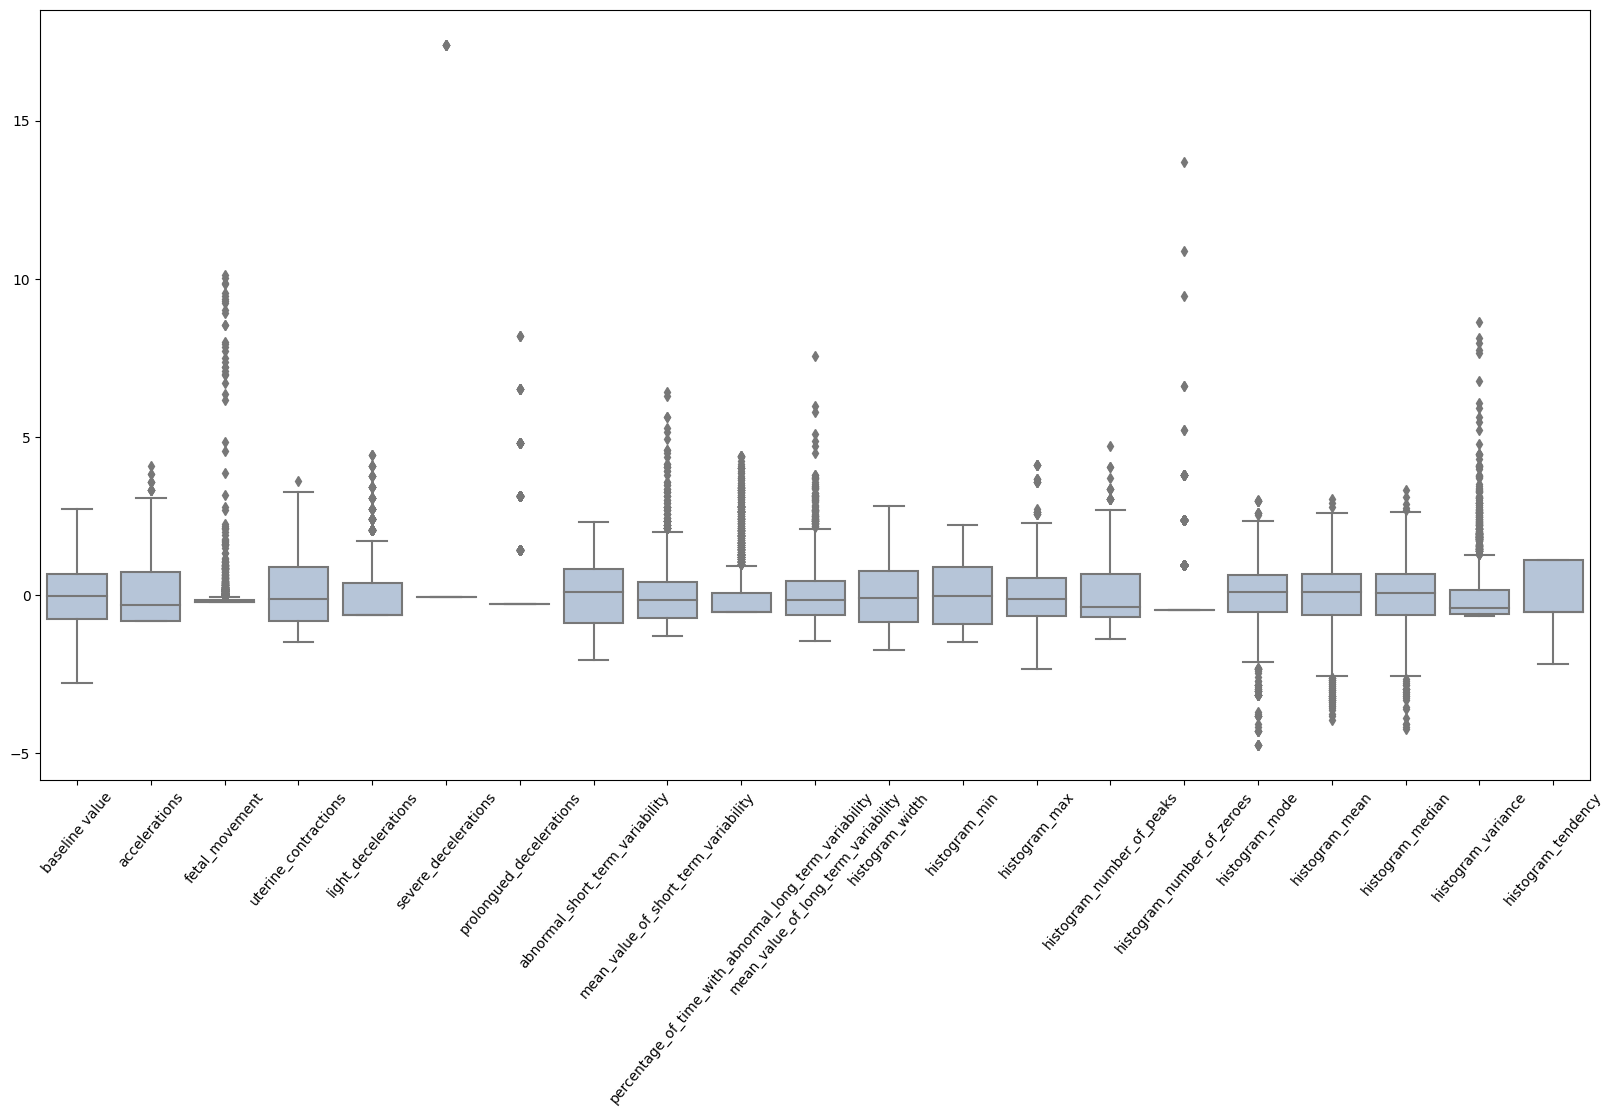

In [24]:
plt.figure(figsize=(20,10))
plot = sns.boxplot(data = X_df, color='lightsteelblue')
plt.xticks(rotation=50)
plt.show()
fig = plot.get_figure()
fig.savefig("after.png") 

## Feature importance with coefficients

Feature: baseline value, Score: 0.15202525118497862
Feature: accelerations, Score: 0.000532417431539707
Feature: fetal_movement, Score: 0.003926024300875141
Feature: uterine_contractions, Score: -0.06742825046663985
Feature: light_decelerations, Score: -0.010201645871248203
Feature: severe_decelerations, Score: 0.04360200977752453
Feature: prolongued_decelerations, Score: 0.2136316691074172
Feature: abnormal_short_term_variability, Score: 0.14793055906266278
Feature: mean_value_of_short_term_variability, Score: 0.0014700678198556018
Feature: percentage_of_time_with_abnormal_long_term_variability, Score: 0.21552626559780863
Feature: mean_value_of_long_term_variability, Score: 0.03267645655815181
Feature: histogram_width, Score: -0.02240931726825204
Feature: histogram_min, Score: 0.0768138480360027
Feature: histogram_max, Score: 0.0778894843356185
Feature: histogram_number_of_peaks, Score: -0.008628678769220053
Feature: histogram_number_of_zeroes, Score: 0.008743691990542785
Feature: his

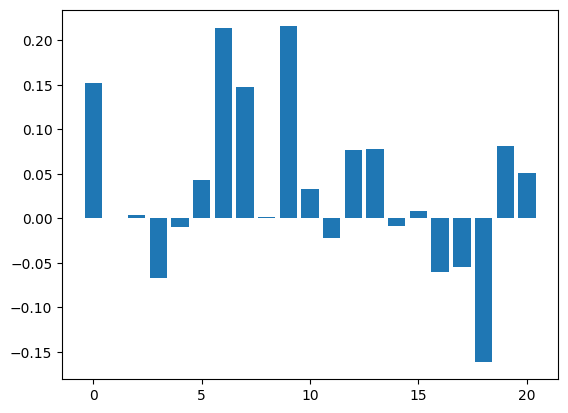

In [26]:
model = LinearRegression()
cols = fetal.columns
model.fit(X, y)
coef = {}
importance = model.coef_
for i,v in enumerate(importance):
    coef[cols[i]] = v
    print(f'Feature: {cols[i]}, Score: {v}')
# coeff_df = pd.DataFrame(coef)   
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
pd.DataFrame.from_dict(coef, orient='index', columns=['coeff']).sort_values(by='coeff', ascending=False).to_csv('coeff.csv')

## We go with a 80-20% train-test split using StratifiedShuffleSplit

In [28]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## One vs All

In [29]:
models = {
    "RF": {
        'model': RandomForestClassifier,
        'params': {
            'criterion' : ["gini", "entropy"],
            'max_depth': [None, 10, 100, 500],
            'n_estimators': [5, 10, 20, 100]
        }
    },
    "LR": {
        'model': LogisticRegression,
        'params': {
            'C': [1,10,20],
            'solver': ['newton-cg', 'liblinear']
        }
    },
    "SVM": {
        'model': SVC,
        'params': {
            'C': [0.01, 0.1, 1],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto', 1, 10, 0.1]
        }
    }
}

In [30]:
results = []

for model_name, attr in models.items():
    gridcv = GridSearchCV(attr['model'](), attr['params'], cv=5, verbose=True, refit=True, scoring='accuracy')
    gridcv.fit(X_train, y_train)
    results.append({
        'model': model_name,
        'best_score': gridcv.best_score_,
        'best_params': gridcv.best_params_
    })
    
model_result_df = pd.DataFrame(results, columns=['model', 'best_score', 'best_params'])
model_result_df.sort_values(by=['best_score'], ascending=False)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


model  best_score                                        best_params
0    RF    0.942941  {'criterion': 'gini', 'max_depth': 500, 'n_est...
2   SVM    0.914118          {'C': 0.01, 'gamma': 1, 'kernel': 'poly'}
1    LR    0.900000                    {'C': 1, 'solver': 'liblinear'}

In [36]:
params = [result['best_params'] for result in results if result['model'] == 'SVM'][0]
model = OneVsRestClassifier(SVC(**params, probability=True))
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       332
           1       0.75      0.68      0.71        59
           2       0.87      0.77      0.82        35

    accuracy                           0.91       426
   macro avg       0.85      0.80      0.83       426
weighted avg       0.90      0.91      0.90       426

Test accuracy: 90.6103%
Train accuracy: 98.2941%


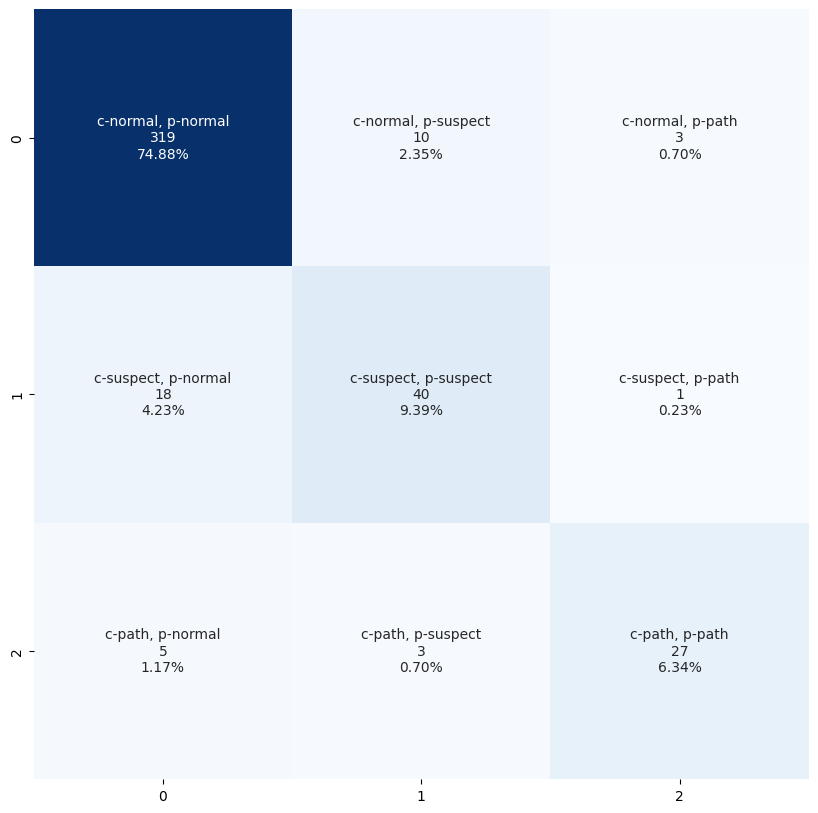

In [37]:
print(classification_report(y_test, y_pred))
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Test accuracy: %.4f%%" % (test_accuracy * 100.0))
print("Train accuracy: %.4f%%" % (train_accuracy * 100.0))

utils.print_conf_matrix(conf_matrix, 'SVM')

In [38]:
params = [result['best_params'] for result in results if result['model'] == 'LR'][0]
model = OneVsRestClassifier(LogisticRegression(**params))
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature nam

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       332
           1       0.57      0.63      0.60        59
           2       0.88      0.60      0.71        35

    accuracy                           0.87       426
   macro avg       0.79      0.72      0.75       426
weighted avg       0.88      0.87      0.87       426

Test accuracy: 87.32%
Train accuracy: 90.65%


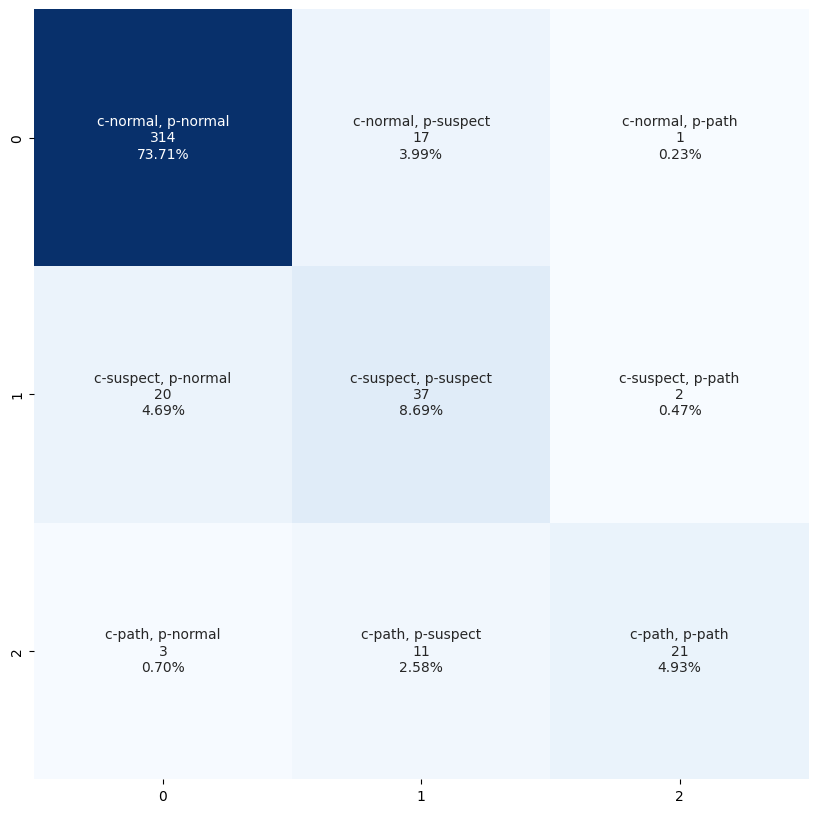

In [32]:
print(classification_report(y_test, y_pred))
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Test accuracy: %.2f%%" % (test_accuracy * 100.0))
print("Train accuracy: %.2f%%" % (train_accuracy * 100.0))

utils.print_conf_matrix(conf_matrix, 'LR')

In [39]:
params = [result['best_params'] for result in results if result['model'] == 'RF'][0]
model = OneVsRestClassifier(RandomForestClassifier(**params))
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       332
           1       0.89      0.71      0.79        59
           2       0.84      0.89      0.86        35

    accuracy                           0.94       426
   macro avg       0.89      0.86      0.87       426
weighted avg       0.94      0.94      0.93       426

Test accuracy: 93.66%
Train accuracy: 99.94%


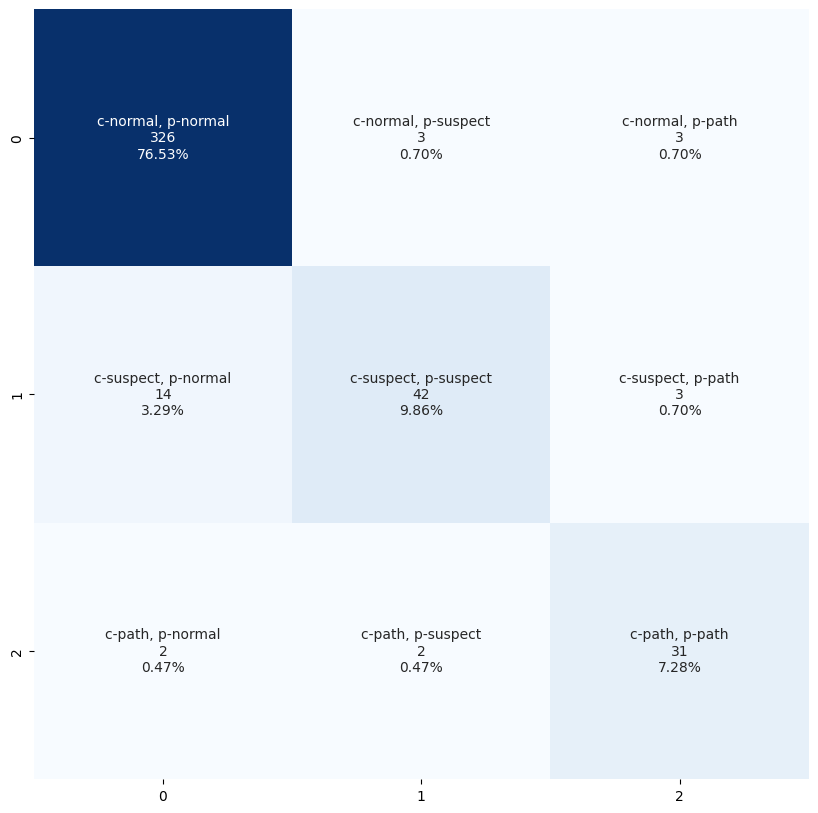

In [34]:
print(classification_report(y_test, y_pred))
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Test accuracy: %.2f%%" % (test_accuracy * 100.0))
print("Train accuracy: %.2f%%" % (train_accuracy * 100.0))

utils.print_conf_matrix(conf_matrix, 'RF')

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted

0 ROC AUC OvR: 0.9839
1 ROC AUC OvR: 0.9610
2 ROC AUC OvR: 0.9935
average ROC AUC OvR: 0.9795


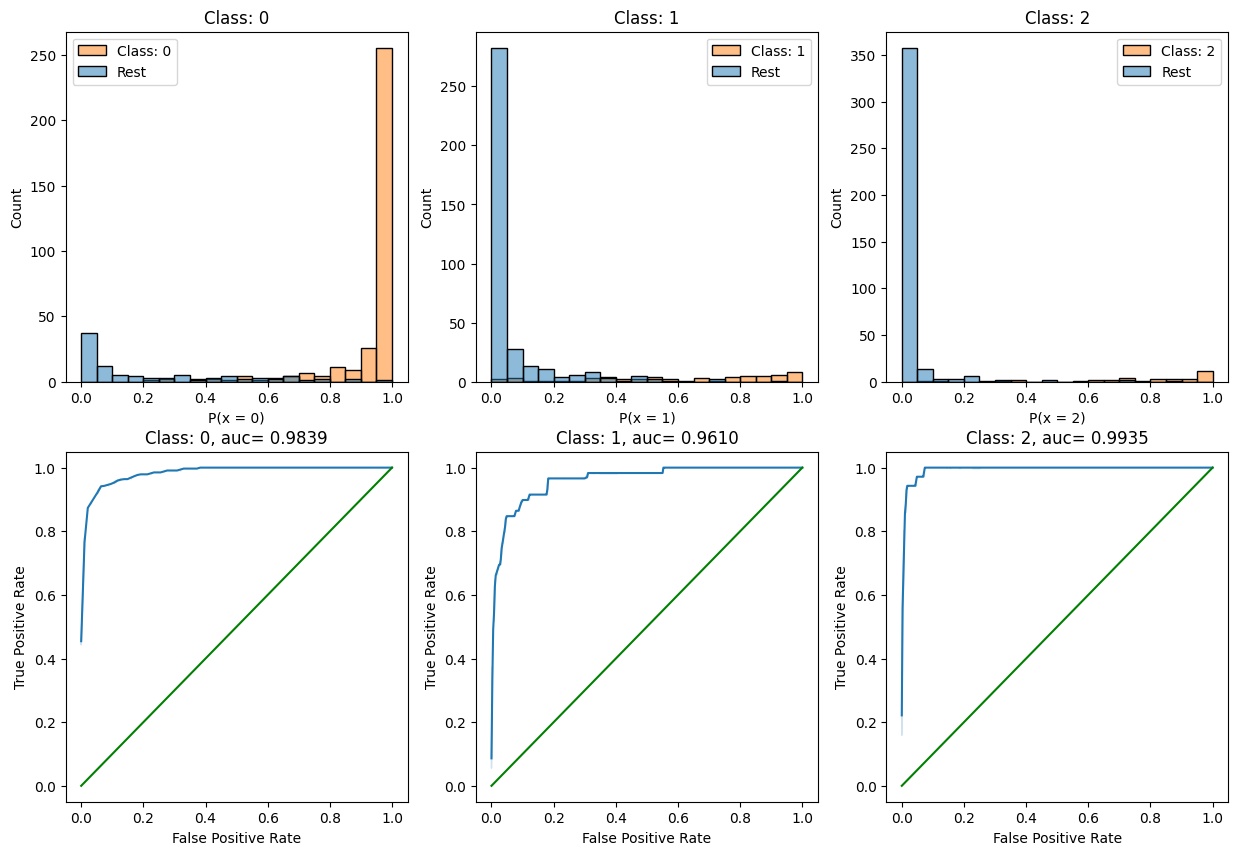

In [40]:
params = [result['best_params'] for result in results if result['model'] == 'RF'][0]
model = OneVsRestClassifier(RandomForestClassifier(**params))
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Plots the Probability Distributions and the ROC Curves One vs Rest
classes = model.classes_
fig = plt.figure(figsize = (15, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    X_test = pd.DataFrame(X_test, columns=num_attribs)   
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Calculates the ROC AUC OvR
    class_roc = utils.roc_auc_score(df_aux['class'], df_aux['prob'])
    roc_auc_ovr[c] = class_roc
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(f"Class: {c}")
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = utils.get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    utils.plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title(f"Class: {c}, auc= {class_roc:.4f}")
    # ax_bottom.set_label(f"class: {c}, auc= {class_roc:.4f}")
        
fig.savefig('full_figure.png')

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

## One vs one

In [41]:
model = SVC(**gridcv.best_params_, probability=True, decision_function_shape='ovo')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [42]:
print(classification_report(y_test, y_pred))
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: %.2f%%" % (test_accuracy * 100.0))
print("Train accuracy: %.2f%%" % (train_accuracy * 100.0))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       332
           1       0.76      0.64      0.70        59
           2       0.93      0.74      0.83        35

    accuracy                           0.91       426
   macro avg       0.87      0.79      0.82       426
weighted avg       0.90      0.91      0.90       426

Test accuracy: 90.61%
Train accuracy: 99.94%


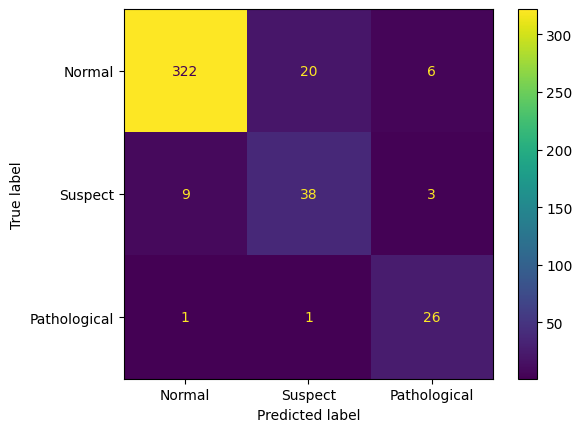

In [45]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, values_format="d", display_labels=["Normal", "Suspect", "Pathological"])

In [46]:
from itertools import combinations

classes = model.classes_

classes_combinations = []
combs = combinations(classes, 2)
for comb in combs:
    classes_combinations.append(list(comb))
classes_combinations

[[0, 1], [0, 2], [1, 2]]

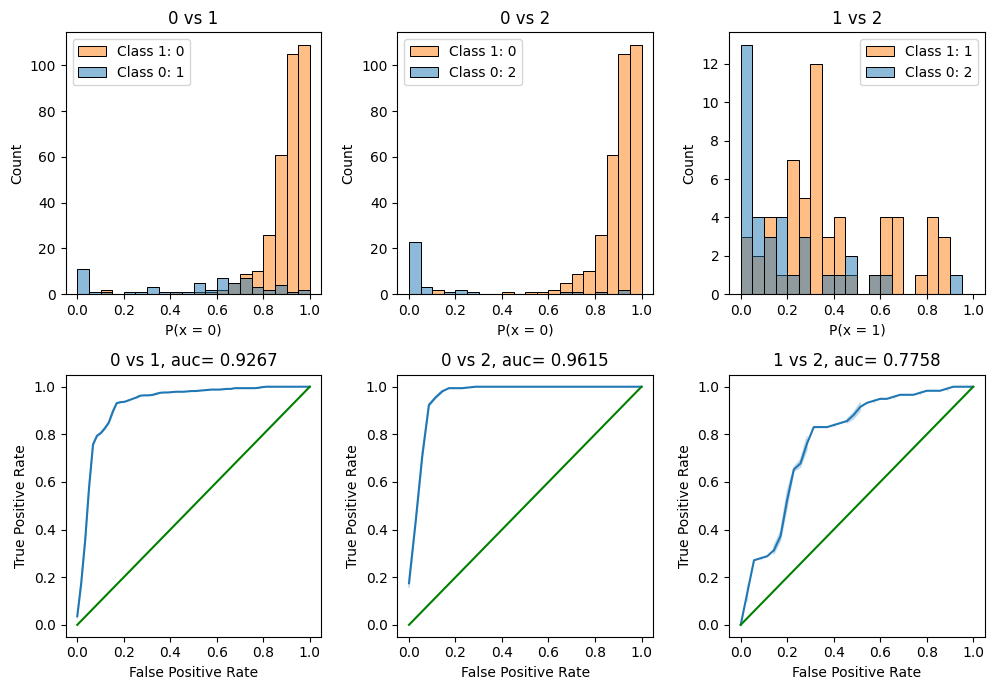

In [47]:
# Plots the Probability Distributions and the ROC Curves One vs ONe
class_list = list(classes)
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = f"{c1} vs {c2}"
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Calculates the ROC AUC OvO
    class_roc = utils.roc_auc_score(df_aux['class'], df_aux['prob'])    
    roc_auc_ovo[title] = class_roc
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = utils.get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    utils.plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title(f"{title}, auc= {class_roc:.4f}")
    
plt.tight_layout()

### References

- https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
- https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
- https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html

### BOOSTING

In [48]:
import xgboost

In [49]:
#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = xgboost.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    tree_method='hist',
    grow_policy='lossguide',
    use_label_encoder=False
)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train)

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

#predictions - inputs to confusion matrix
train_predictions = clf0.predict(X_train)
test_predictions = clf0.predict(X_test)

#storing computed values in results dictionary
results_dict['xgbc0'] = {
    'iterable_parameter': np.nan,
    'classifier': deepcopy(clf0),
    'cv_results': df.copy(),
    'cfm_train': confusion_matrix(y_train, train_predictions),
    'cfm_test': confusion_matrix(y_test, test_predictions),
    'train_accuracy': accuracy_score(y_train, train_predictions),
    'test_accuracy': accuracy_score(y_test, test_predictions),
    'test roc auc score': roc_auc_score(y_test, clf0.predict_proba(X_test), multi_class="ovr"),
    'best_params': clf0.best_params_,
    'predict_proba': clf0.predict_proba(X_test),
    'classification_report': classification_report(y_test, test_predictions)
}

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 1 candidates, totalling 3 fits


d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [50]:
params = deepcopy(default_params)

#setting grid of selected parameters for iteration
param_grid = {
    'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5,6,7,8,9,10,11,12,13,14],
    'n_estimators': [50,65,80,100,115,130,150],
    'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
 }

In [51]:
import time

#start time
t0 = time.time()
#No. of jobs
gcvj = np.cumsum([len(x) for x in param_grid.values()])[-1]

#iteration loop. Each selected parameter iterated separately
for i,grid_key in enumerate(param_grid.keys()):
    
    #variable for measuring iteration time
    loop_start = time.time()
       
    #creating param_grid argument for GridSearchCV:
    #listing grid values of current iterable parameter and wrapping non-iterable parameter single values in list
    for param_key in params.keys():
        if param_key == grid_key:
            params[param_key] = param_grid[grid_key]
        else:
            #use best parameters of last iteration
            try:
                param_value = [clf.best_params_[param_key]]
                params[param_key] = param_value
            #use benchmark model parameters for first iteration
            except:
                param_value = [clf0.best_params_[param_key]]
                params[param_key] = param_value
    
    #classifier instance of current iteration
    xgbc = xgboost.XGBClassifier(**default_params)
    
    #GridSearch instance of current iteration
    clf = GridSearchCV(estimator=xgbc, param_grid=params, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
    clf.fit(X_train, y_train)
    
    #results dataframe
    df = pd.DataFrame(clf.cv_results_)
    
    #predictions - inputs to confusion matrix
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
       
    #storing computed values in results dictionary
    results_dict[f'xgbc{i+1}'] = {
        'iterable_parameter': grid_key,
        'classifier': deepcopy(clf),
        'cv_results': df.copy(),
        'cfm_train': confusion_matrix(y_train, train_predictions),
        'cfm_test': confusion_matrix(y_test, test_predictions),
        'train_accuracy': accuracy_score(y_train, train_predictions),
        'test_accuracy': accuracy_score(y_test, test_predictions),
        'test roc auc score': roc_auc_score(y_test, clf0.predict_proba(X_test), multi_class="ovr"),
        'best_params': clf.best_params_,
        'predict_proba': clf.predict_proba(X_test),
        'classification_report': classification_report(y_test, test_predictions)
     }
    
    #variable for measuring iteration time
    elapsed_time = time.time() - loop_start
    print(f'iteration #{i+1} finished in: {elapsed_time} seconds')

#stop time
t1 = time.time()

#elapsed time
gcvt = t1 - t0

d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 13 candidates, totalling 39 fits


d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

iteration #1 finished in: 2.6279923915863037 seconds
Fitting 3 folds for each of 12 candidates, totalling 36 fits


d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

iteration #2 finished in: 3.504000425338745 seconds
Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

iteration #3 finished in: 2.147998809814453 seconds
Fitting 3 folds for each of 7 candidates, totalling 21 fits


d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

iteration #4 finished in: 1.4520022869110107 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits


d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

iteration #5 finished in: 1.4959988594055176 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits


d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

iteration #6 finished in: 1.8929991722106934 seconds


d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\OneDrive\Masters\SEM 3\ML\Gridsearch assignment\venv38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


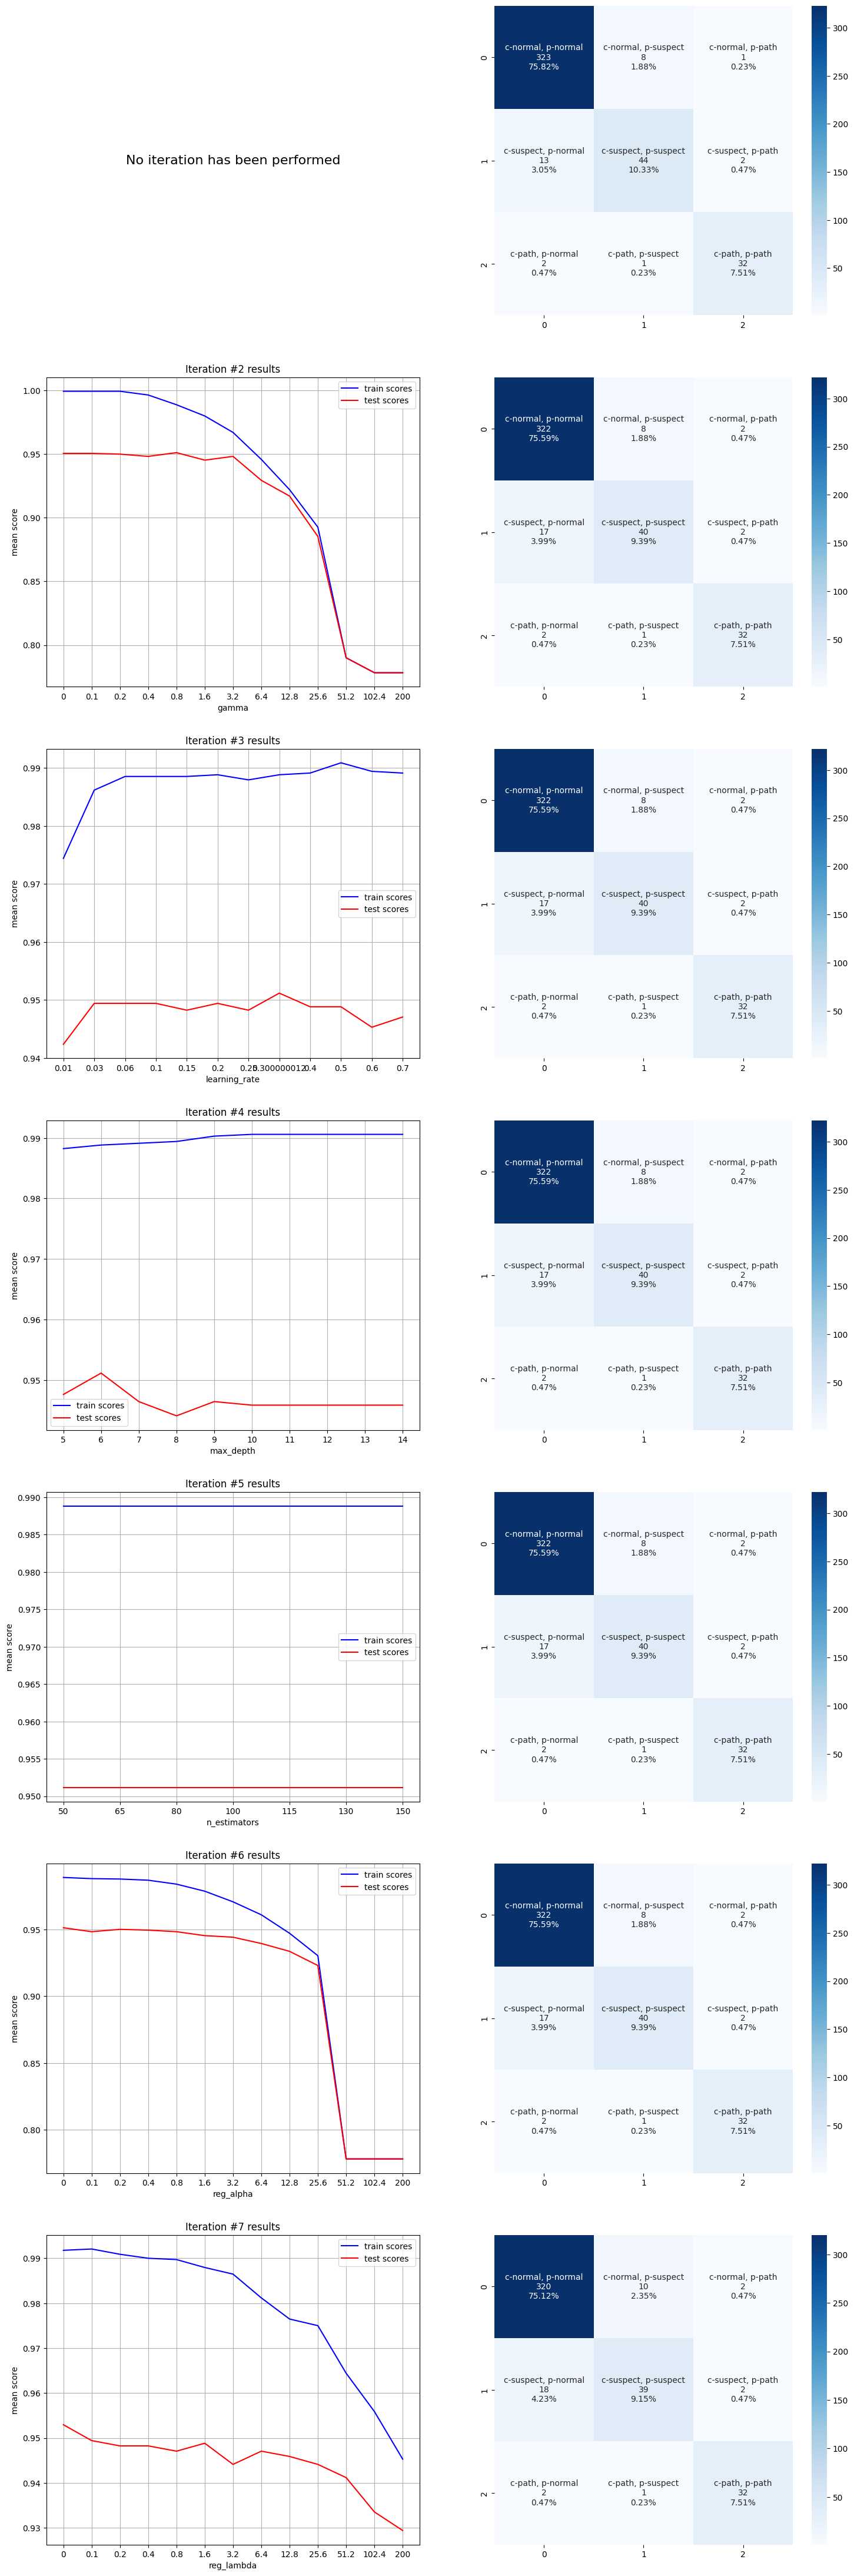

In [52]:
#number of rows depend on number of iterations
nrows = len(results_dict.keys())

#standard group names for confusion matrices (Normal), 2 (Suspect) and 3 (Pathological)
group_names = ['c-normal, p-normal','c-normal, p-suspect','c-normal, p-path',
               'c-suspect, p-normal', 'c-suspect, p-suspect', 'c-suspect, p-path',
               'c-path, p-normal','c-path, p-suspect','c-path, p-path']

#creating figure
f, axes = plt.subplots(nrows,2,figsize=(18,8*nrows));

#iteratively plotting train/test accuracy scores and test confusion matrix
for i,ax in enumerate(axes):
    
    #current key of results dictionary
    ckey = list(results_dict.keys())[i] 
    
    #plotting scores for models other than the benchark model
    if ckey != 'xgbc0':
        x1 = results_dict[ckey]['cv_results'].loc[:,'mean_train_score']
        x2 = results_dict[ckey]['cv_results'].loc[:,'mean_test_score']
        
        ax[0].plot(x1, label='train scores', color='blue');
        ax[0].plot(x2, label='test scores', color='red');
        ax[0].set_title(f'Iteration #{i+1} results');
               
        ax[0].set_xticks(list(range(0,len([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]))));
        ax[0].set_xticklabels(sorted([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]));
    
        ax[0].grid('major');
        ax[0].legend();
        ax[0].set_xlabel(results_dict[ckey]['iterable_parameter'])
        ax[0].set_ylabel('mean score');
    
    #leaving scores plot blank for benchmark model
    else:
        ax[0].axis('off')
        ax[0].text(x=0.5, y=0.5, s='No iteration has been performed', fontsize=16, va='center', ha='center')
    
    #computing variables for specific confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in results_dict[ckey]['cfm_test'].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in results_dict[ckey]['cfm_test'].flatten()/np.sum(results_dict[ckey]['cfm_test'])]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    
    #plotting confusion matrix
    # ax[1].set_title(f'Iteration #{i+1} accuracy: {round(results_dict[ckey]['test_accuracy'], 3)}');
    sns.heatmap(results_dict[ckey]['cfm_test'], annot=labels, fmt='', cmap='Blues', ax=ax[1])
    
plt.show();

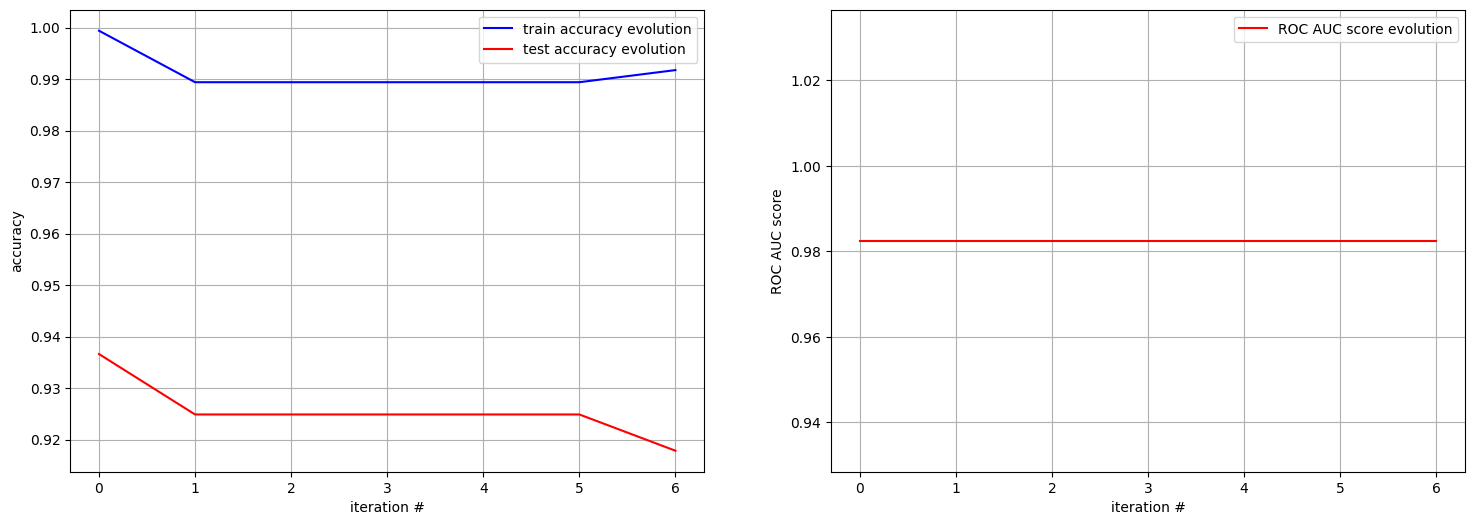

In [53]:
f, axes = plt.subplots(1,2,figsize=(18,6));

#plotting evolution of train/test accuracy scores for subsequent iterations
axes[0].plot([results_dict[key]['train_accuracy'] for key in results_dict.keys()], label='train accuracy evolution', color='blue');
axes[0].plot([results_dict[key]['test_accuracy'] for key in results_dict.keys()], label='test accuracy evolution', color='red');

#setting labels, drawing legend and major grid
axes[0].set_xlabel('iteration #');
axes[0].set_ylabel('accuracy');
axes[0].legend();
axes[0].grid('major');

#plotting evolution of test ROC AUC scores for subsequent iterations
axes[1].plot([results_dict[key]['test roc auc score'] for key in results_dict.keys()], label='ROC AUC score evolution', color='red');

#setting labels, drawing legend and major grid
axes[1].set_xlabel('iteration #');
axes[1].set_ylabel('ROC AUC score');
axes[1].legend();
axes[1].grid('major');

plt.show();

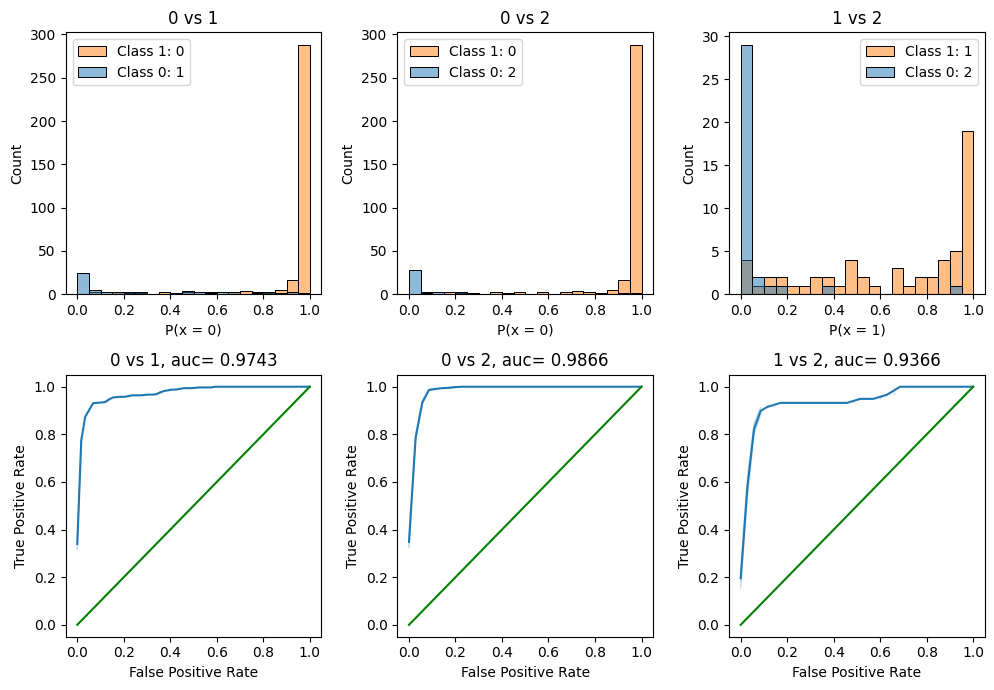

In [54]:
y_proba = results_dict['xgbc6']['predict_proba']
class_list = list(classes)
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = f"{c1} vs {c2}"
    
    # Prepares an auxiliar dataframe to help with the plots
    X_test = pd.DataFrame(X_test, columns=num_attribs)
    df_aux = X_test.copy()
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Calculates the ROC AUC OvO
    class_roc = utils.roc_auc_score(df_aux['class'], df_aux['prob'])    
    roc_auc_ovo[title] = class_roc
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = utils.get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    utils.plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title(f"{title}, auc= {class_roc:.4f}")
    
plt.tight_layout()

In [55]:
print(classification_report(y_test, y_pred))
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: %.2f%%" % (test_accuracy * 100.0))
print("Train accuracy: %.2f%%" % (train_accuracy * 100.0))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       332
           1       0.76      0.64      0.70        59
           2       0.93      0.74      0.83        35

    accuracy                           0.91       426
   macro avg       0.87      0.79      0.82       426
weighted avg       0.90      0.91      0.90       426

Test accuracy: 90.61%
Train accuracy: 99.94%


In [56]:
print(results_dict['xgbc6']['classification_report'])

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       332
           1       0.78      0.66      0.72        59
           2       0.89      0.91      0.90        35

    accuracy                           0.92       426
   macro avg       0.87      0.85      0.86       426
weighted avg       0.91      0.92      0.92       426

